# Importando as bibliotecas para utilizar na Rede Neural Convolucional

*   **Primeiro:** vamos importa a biblioteca numpy para fazer alguns cálculos científicos
*   **Segundo:** vamos importar as bibliotecas os e csv para abrir o nosso arquivo para utilizarmos as nossas imagens.
*   **Terceiro:** vamos importar as bibliotecas "skimage" para poder fazer manipulação na imagem
*   **Quarto:** vamos importar o modelo "Sequential" para utilizar o keras como camada feed-foward.
*   **Quindo** vamos importar a biblioteca "Matplotlib" para plotarmos a imagen que estamos utilizando.







In [0]:
import numpy as np
import os
import csv 
from skimage import io, transform
import matplotlib.pyplot as plt

# Importando o google drive para montar e conseguir treinar as imagens


1.   Será preciso importar a biblioteca *drive*;
2.   Depois será preciso montar o arquivo para que possa utilizar o google drive como caminho



In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Após montar o drive vamos implementar algumas funções para podermos pegar as nossas imagens. Abaixo segue especificando cada uma delas:


1.   **Abrir o arquivo csv:** para abrir o arquivo .csv implementamos uma função;
2.   **Abrir as imagens:** para abrir as imagens implementamos uma função que tem como base o arquivo .csv
3.   **Mudar o número das classes:** como as classes não começa com uma orde foi necessário escalar as imagens para que ficassem em uma escala entre zero até a classe mais alta que do zero ao 29;








In [0]:

def openCsv(wayFile):
    way_classes = []
    way_datas = []
    
    count = 0
    
    with open(wayFile, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            way_datas.append(row[0])
            way_classes.append(int(row[1]))
    return way_datas, way_classes
  
def openImage(way_path, way_image, width, height):
    X = []
    for i in range(0, len(way_image)):
        img = io.imread('%s%s' % (way_path, way_image[i]))
        img = img[...,:3]
        img = transform.resize(img,(width, height))
        X.append(img)
    return X
  
def map_classes(way_classes):
    m = {}
    y = np.zeros(len(way_classes))
    uc = np.unique(way_classes)
    
    for i in range(0, len(uc)):
        m[uc[i]] = i
    
    for i in range(0, len(way_classes)):
        y[i] = m[way_classes[i]]
        
    return y, m, uc

# Rodando as funções - openCsv(), openImage() e map_classes().



> Nesta Seção será executado as funções que implementamos, para isso definiremos a altura e largura das imagens para que ambas ficam com tamanho padrão.



*   **OBS.:** Transformaremos a lista X_data e y_layers em **array**; as imagens terão 229 de **largura** e 229 de **altura** pois a arquitetura que utilizaremos para que funcione de forma eficiente é necessário que utilizemos as imagens com está redimensão.







In [4]:
#if achiteture is Inception
#width = 299
#height = 299
#If achitecture is NasNet 331 331 3
#width = 331
#height = 331
#If achitecture is VGG 224 224 3
#width = 224
#height = 224
#If achitecture is Xception 299 299 3
#width = 299
#height = 299
#ResNet50 is 244 224 3
width = 224
height = 224


way_path = '/content/drive/My Drive/ColabNotebooks/A1_A2_A3_A4/'
way_image, way_classes = openCsv('/content/drive/My Drive/ColabNotebooks/A1_A2_A3_A4.csv')
X_datas = openImage(way_path, way_image, width, height)
#y_layers, m, uc = map_classes(way_classes)
y_layers = way_classes
X_datas = np.asarray(X_datas)
y_layers = np.asarray(y_layers)


print(y_layers.shape)
print(y_layers)

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(810,)
[15 11 15 15 12 14 15 16 11 13 16 16 13 14 16 14 15 18 14 14 20 19 16 15
 17 15 14 18 18 16 15 20 19 18 17 18 19 15 15 18 17 17 14 18 18 15 17 16
 20 17 18 16 16 17 15 14 18 18 16 15 18 15 15 16 19 19 15 17 19 15 14 18
 17 15 18 16 15 16 17 19 17 16 17 15 15 17 17 16 15 18 15 18 16 19 19 16
 16 17 15 15 18 16 15 19 18 15 17 16 18 20 16 15 17 15 15 16 17 16 14 19
 18 14 16 16 18 17 18 16  5  4  3  4  5  7  4  5  6  8  5  7  7  9  8  9
  9 12 10  9 11 14 12 12 11 15 12 15 18 15 16  4  4  6  7  7  7  3  5  6
  7  9  9  2  4  5  7  2  3  5  6  2  3  6  6  7  7  7  7  7  7  6  7  7
  4  7  6  7  5  7  7  7  8  5  7  6  6  7  7  7  7  5  7  7  5  6  6  7
  5  7  7  7  8  6  7  6  6  7  7  8  6  6  7  7  5  6  6  8  4  7  7  8
  8  6  7  7  7  8  7  7  7  6  7  7  4  7  7  8  5  7  7  8  9  7  8  8
  7  8  7  8  7  7  7  7  5  8  7  8  7  8  8  8  9  6  8  8  7  8  8  9
  8  7  8  8  8  9  7  9  7  8  9  9 10  6  9  9  8  9 10 11  9  8 10 11
  9  9  7 11  8  9 10  9 10  8 10 10  8 10  

# Agora vamos importar as bibliotecas e modelos que utilizaremos na nossa Rede Neural

*   **Modelo**: Sequencial;
*  **Camadas**: Convolution2D, MaxPooling2D; Dropout, Flatten, Dense
*   **Utilidas**: np_utils


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop, SGD, Adam

Using TensorFlow backend.


# Nesta Seção vamos dividir o nosso conjunto de dados em conjunto de traino e validação.

*   **Sklearn**: utilizaremos esta biblioteca para dividirmos o conjunto de treinamento aleatóriamente;

# Depois de dividirmos em conjunto de treinamento e validação vamos transformar o vetor de classes.

> Para fazer isso utilizaremos a biblioteca np_utils para transformar o vetor de classes para uma matriz de classes binárias.
> O tamanho da matriz será a quantidade únicas de classes.

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_datas, y_layers, test_size=0.20, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

#x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], x_train.shape[2]))
#x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1], x_val.shape[2]))

#y_train = np_utils.to_categorical(y_train, len(uc))
#Y_test = np_utils.to_categorical(y_test, len(uc))
#y_val = np_utils.to_categorical(y_val, len(uc))

print(X_datas.shape)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
#print(np.asarray(range(len(uc))))
#print(y_val[0,:])

(810, 224, 224, 3)
(518, 224, 224, 3)
(162, 224, 224, 3)
(130, 224, 224, 3)


# Implementation Convolution Neural Network with Xception

In [7]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model

model = ResNet50(weights='imagenet', include_top=True, input_shape=(224,224, 3))

x = model.get_layer(index=len(model.layers)-2).output

print(x)
x = Dense(1)(x)

model = Model(inputs=model.input, outputs=x)
model.summary()

Tensor("avg_pool/Mean:0", shape=(?, 2048), dtype=float32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________

In [0]:
opt = RMSprop(lr=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

In [9]:
network_history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data= (x_val, y_val))

Train on 518 samples, validate on 130 samples
Epoch 1/100
518/518 [==============================] - 28s 54ms/step - loss: 47.4409 - mean_absolute_error: 4.8626 - val_loss: 3.7018 - val_mean_absolute_error: 1.4667
Epoch 2/100
518/518 [==============================] - 15s 29ms/step - loss: 6.3108 - mean_absolute_error: 1.8668 - val_loss: 12.6586 - val_mean_absolute_error: 2.8661
Epoch 3/100
518/518 [==============================] - 15s 29ms/step - loss: 3.1681 - mean_absolute_error: 1.3029 - val_loss: 6.7271 - val_mean_absolute_error: 2.2039
Epoch 4/100
518/518 [==============================] - 15s 29ms/step - loss: 3.4190 - mean_absolute_error: 1.2942 - val_loss: 6.2612 - val_mean_absolute_error: 2.0289
Epoch 5/100
518/518 [==============================] - 15s 29ms/step - loss: 3.2625 - mean_absolute_error: 1.3564 - val_loss: 7.4650 - val_mean_absolute_error: 2.0522
Epoch 6/100
518/518 [==============================] - 15s 29ms/step - loss: 1.9134 - mean_absolute_error: 1.0407 - v

# Salvar o Modelo Xception

In [0]:
#model.save('/content/drive/My Drive/ColabNotebooks/AllmodeloRMSpropXception.h5')

model.save('/content/drive/My Drive/ColabNotebooks/ResNet/modelResNet50.h5')

# Carregar o Modelo Xception

In [0]:
from keras.models import load_model

#model = load_model('/content/drive/My Drive/ColabNotebooks/AllmodeloRMSpropXception.h5')

model = load_model('/content/drive/My Drive/ColabNotebooks/ResNet/modelResNet50.h5')

# Predict to Inception Xception -- RMSprop

**All of set text**

162/162 [==============================] - 3s 16ms/step
135
13
158
	As tres imagens que estao piores preditas


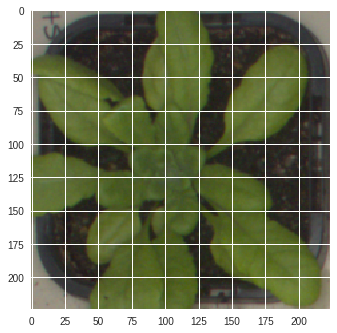

('Ground Truth: ', 23)
('Prediceted: ', 27.032833)


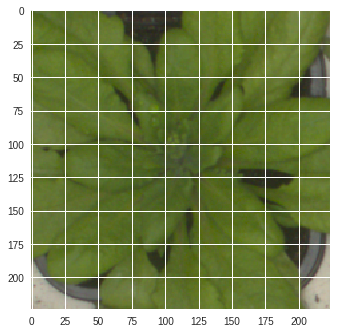

('Ground Truth: ', 29)
('Prediceted: ', 32.58191)


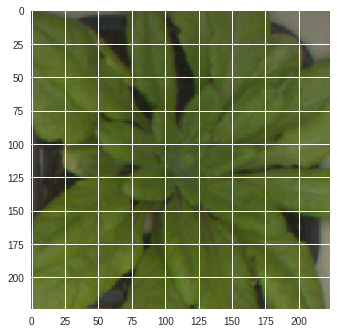

('Ground Truth: ', 28)
('Prediceted: ', 30.792185)
	As tres imagens que estao melhores preditas


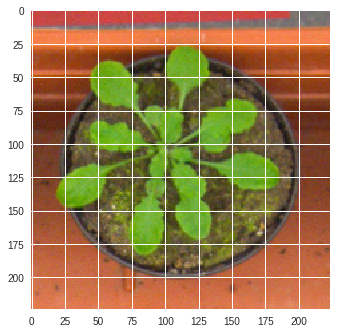

('Ground Truth: ', 17)
('Prediceted: ', 16.98919)


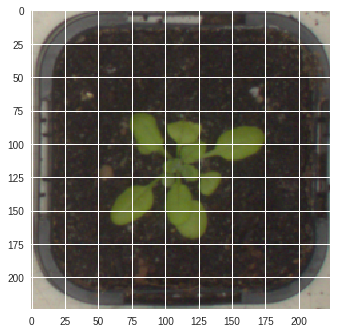

('Ground Truth: ', 12)
('Prediceted: ', 12.019675)


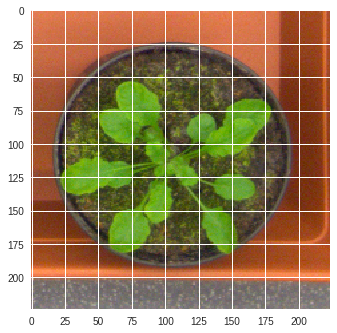

('Ground Truth: ', 17)
('Prediceted: ', 17.043837)


In [12]:

predictTest = model.predict(x_test, verbose=1)
predictTest = predictTest.reshape(predictTest.shape[0])
#predictTest = predictTest.astype('int32')
#print(x_test.shape)
#print(predictTest.shape)
#print(y_test.shape)
#print(np.round(predictTest))
#print(y_test)
#print(predictTest)

mae = np.abs(y_test - predictTest)
#print(mae)
pos = np.argsort(mae)

print(pos[-1])
print(pos[-2])
print(pos[-3])

#As três imagens piores preditas.
print("\tAs tres imagens que estao piores preditas")
img1 = plt.imshow(x_test[pos[-1]], interpolation='none')
plt.show()
print("Ground Truth: ",y_test[pos[-1]])
print("Prediceted: ",predictTest[pos[-1]])

img2 = plt.imshow(x_test[pos[-2]], interpolation='nearest')
plt.show()
print("Ground Truth: ",y_test[pos[-2]])
print("Prediceted: ",predictTest[pos[-2]])

img3 = plt.imshow(x_test[pos[-3]], interpolation='nearest')
plt.show()
print("Ground Truth: ",y_test[pos[-3]])
print("Prediceted: ",predictTest[pos[-3]])

#As três imagens que estao melhores preditas.
print("\tAs tres imagens que estao melhores preditas")
img1 = plt.imshow(x_test[pos[1]], interpolation='nearest')
plt.show()
print("Ground Truth: ",y_test[pos[1]])
print("Prediceted: ",predictTest[pos[1]])

img2 = plt.imshow(x_test[pos[2]], interpolation='nearest')
plt.show()
print("Ground Truth: ",y_test[pos[2]])
print("Prediceted: ",predictTest[pos[2]])

img3 = plt.imshow(x_test[pos[3]], interpolation='nearest')
plt.show()
print("Ground Truth: ",y_test[pos[3]])
print("Prediceted: ",predictTest[pos[3]])




**All of set train**

In [15]:
predictTrain = model.predict(x_train, verbose=1)
predictTrain = predictTrain.reshape(predictTrain.shape[0])
#predictTrain = predictTrain.astype('int32')
print(x_train.shape)
print(predictTrain.shape)
print(y_train.shape)
print(np.round(predictTrain))
print(y_train)

518/518 [==============================] - 4s 8ms/step
(518, 224, 224, 3)
(518,)
(518,)
[16.  7.  9.  8. 15.  9.  4. 11.  6.  3.  9. 11.  6. 10.  5.  3. 20.  4.
 12.  7.  6. 30. 18.  7. 10. 31. 18. 10.  7. 16.  6. 13. 15. 16.  8.  8.
 15. 17. 12.  8. 14. 15. 10. 15.  6.  2.  9.  4. 17.  4. 11.  8.  5.  5.
 17. 16. 19. 10.  9. 21.  6. 18. 18.  6. 14. 22. 16. 11. 13.  7. 20.  7.
 21. 11.  8. 17.  7.  7. 10. 18. 15. 18. 10. 16. 21. 14. 26.  7.  5. 12.
 12. 18. 14. 11. 22. 22. 20.  8.  9. 15. 12. 15.  5.  9. 19. 13. 18. 19.
 15.  7. 17. 17. 18. 22.  8.  9. 17.  6. 17.  5.  7.  4. 14. 17. 13. 22.
 26.  9. 13. 28. 19. 34.  8.  6. 14. 18.  9.  6. 13.  5. 17. 20. 10.  9.
 11. 11. 15.  7.  9. 16. 26. 16. 29. 12.  7. 18. 14.  6. 10.  9. 16. 11.
  8. 12.  4. 11. 11. 13. 19. 26. 19. 12. 15. 10. 14. 21. 10.  7. 23. 20.
 11. 15. 30.  9. 14.  4.  6. 24.  6. 10. 19.  5. 18. 17. 16. 10. 16. 17.
 14.  8.  7.  8.  6. 18.  9.  5.  7. 11.  7.  8. 13.  7. 18.  7. 12.  9.
 11. 30. 19.  9.  7.  6.  6.  6. 18.

**All of set validation**

In [16]:
predictVal = model.predict(x_val, verbose=1)
predictVal = predictVal.reshape(predictVal.shape[0])
#predictVal = predictVal.astype('int32')
print(x_val.shape)
print(predictVal.shape)
print(y_val.shape)
print(np.round(predictVal))
print(y_val)

130/130 [==============================] - 1s 8ms/step
(130, 224, 224, 3)
(130,)
(130,)
[11. 12.  9. 21.  6.  6. 16.  6.  8.  4. 14.  6. 17. 28. 22.  6.  6. 27.
 16. 16. 14. 11. 14.  4. 21. 13.  7.  3.  7. 10.  6. 17. 12.  6. 14. 14.
 14.  5. 19. 10. 15. 12. 20.  9. 13.  9.  5. 15.  7.  6. 17. 10.  4. 12.
  5. 10. 18.  6. 13. 15.  7. 17. 16.  5. 16.  8.  8.  5.  7. 14.  6. 17.
 15. 12.  8.  7. 18.  9. 19. 18.  9. 17.  5. 14. 11. 20. 15. 13. 19. 28.
 14. 18.  9. 17. 22.  4. 17. 12.  8. 23.  6. 14. 20. 15. 19. 17.  8. 11.
 31. 15. 12.  8. 10. 10. 18.  4. 12.  5. 22. 11. 10. 12. 18. 24.  6.  9.
 16. 10.  7.  6.]
[11 13 11 20  7  7 16  7  9  8 15  8 18 26 22  7  7 25 15 19 15 13 15  5
 21 14  8  2  8 11  7 17 14  6 15 15 14  6 19 11 15 12 20  9 14 10  4 16
  9  7 18 11  4 12  5 11 20  9 16 14  7 18 16  6 16  9 15  5  7 15  8 18
 14 12  9  8 19  9 19 19 10 17 10 15 13 18 16 14 18 27 14 17  9 19 23  3
 17 13  7 23  7 14 20 15 19 18  9 12 31 15 12  9 13 12 18  2 12  7 17 11
 12 12 19 23  7 10

# Metrics About Xception -- RMSprop

**Metrics "Mean squared error", "Median absolute error",  "R² score" Train**

In [17]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error

y_true = y_train
predict = predictTrain

r2 = r2_score(y_true, predict)
mae = median_absolute_error(y_true, predict)
mse = mean_squared_error(y_true, predict)
print("MSE \t MAE \t R2")
print(mse, "\t", mae,"\t", r2)



MSE 	 MAE 	 R2
(0.6990340271529987, '\t', 0.6783027648925781, '\t', 0.9781942681824422)


In [18]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error

y_true = y_val
predict = predictVal

r2 = r2_score(y_true, predict)
mae = median_absolute_error(y_true, predict)
mse = mean_squared_error(y_true, predict)
print("MSE \t MAE \t R2")
print(mse, "\t", mae,"\t", r2)


MSE 	 MAE 	 R2
(2.216911935035512, '\t', 0.8887948989868164, '\t', 0.926549721806408)


**R² score**

In [19]:
from sklearn.metrics import r2_score

y_true = y_train
predict = predictTrain

r2_score(y_true, predict)


0.9781942681824422

**MAE score**

In [20]:
from sklearn.metrics import median_absolute_error

y_true = y_train
#y_true = y_true.astype('float32')
predict = predictTrain

median_absolute_error(y_true, predict)

0.6783027648925781

**Mean Squared Error -- score**

In [21]:
from sklearn.metrics import mean_squared_error


y_true = y_train
predict = predictTrain

mean_squared_error(y_true, predict)  


0.6990340271529987

**Metrics "Mean squared error", "Median absolute error",  "R² score" Validation**

**R² score**

In [22]:
from sklearn.metrics import r2_score

y_true = y_val
predict = predictVal

r2_score(y_true, predict)


0.926549721806408

**MAE score**

In [0]:
from sklearn.metrics import median_absolute_error

y_true = y_val
predict = predictVal

median_absolute_error(y_true, predict)

0.5541896820068359

**Mean Squared Error -- score**

In [23]:
from sklearn.metrics import mean_squared_error


y_true = y_val
predict = predictVal

mean_squared_error(y_true, predict)  


2.216911935035512

**Metrics "Mean squared error", "Median absolute error",  "R² score" Test**

**R² score**

In [24]:
from sklearn.metrics import r2_score

y_true = y_test
predict = predictTest

r2_score(y_true, predict)


0.9538217899631054

**MAE score**

In [25]:
from sklearn.metrics import median_absolute_error

y_true = y_test
predict = predictTest

median_absolute_error(y_true, predict)

0.8550763130187988

**Mean Squared Error -- score**

In [26]:
from sklearn.metrics import mean_squared_error


y_true = y_test
predict = predictTest

mean_squared_error(y_true, predict)  


1.4490797619263163

# Implementando scatter

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  app.launch_new_instance()


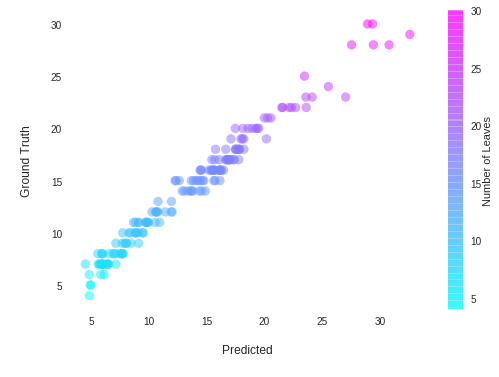

In [27]:
import matplotlib.pyplot as plt


N = y_test.shape
x = predictTest
y = y_test
colors = y_test
#area = np.pi * (10 * np.random.rand(162))**2  # 0 to 15 point radii
area = 80
#plt.title("\nXception\n", fontsize=18)
plt.xlabel("\nPredicted\n", fontsize=12)
plt.ylabel("\nGround Truth\n", fontsize=12)
marker_size=15
#plasma viridis hot
plt.scatter(x, y, s=area, c=colors, cmap='cool', alpha=0.5)
plt.gca().set_axis_bgcolor('white')

cbar= plt.colorbar()
cbar.set_label("Number of Leaves", labelpad=+1)

plt.show()


